Question 1 : Check the membership of fa into the scale Ck,α([−1,1]).   

First we note that fa is infinitely differentiable if a is a positive integer, and int(a)+1 times differentiable if else. Then we consider the quantity sup |f(x)-f(y)|/|x-y|^(alpha) on x,y in [-1,1]. The ratio blows up if x and y are very close to each other, but we can rewrite the numerator as |x^a-y^a|=|x-y|^(a/2).|x+y|^(a/2) so then as long as |x-y|^(a/2) / |x-y^(alpha) is less than 1, we are assured the ratio is of finite value, then a/2<=alpha<=1 so a<=2.
Therefore, in the worst case scenario k has a maximal value of int(a)+1, and alpha has to be bigger than a/2.

In [38]:
import numpy as np       #library imports
import matplotlib.pyplot as plt
import random as rn
from scipy.misc import comb
import math 

Question 2 : Implement an algorithm to approximate fa by a piecewise constant function on the uniform parition of [−1,1] consisting of n subintervals. For example, one could use the value of fa at the midpoint of each subinterval (as happens in the midpoint rule). Plot a couple of illustrative examples with different a and n values. In the asymptotic regime where n is large, we expect the error of the approximation to behave like n^(−r) for some r, which we call the rate of convergence. Implement a procedure to approximately compute the error of the approximation in the maximum norm (You don't need to do anything too complicated), and estimate the rate of convergence for a number of differerent values of a, focusing around the point a=1 (e.g., for a=0.5,0.6,...,1.5). Note that what happens in the preasymptotic regime (i.e., when n is moderate) might pollute your estimate of the convergence rate (especially if you are doing it automatically), so you need to remove small values of n from considerations. To identify roughly where the asymptotic regime starts, some manual fiddling, combined with theoretical insights might be necessary. How does the rate of convergence depend on the regularity of the function? Have a guess at the dependence r=r(a). Explain the behaviour in the context of approximation theory.

In [39]:
def f(a,x):
    #compute fa(x) for some x and given a parameter a
    y=0. #initializing
    if(x>0.): #if non negative
        y=pow(x,a)
    return y

In [40]:
def piecewise (xlist, nx, a, nn, ylist):
    #computes approximation of fa by a piecewise constant function for n subintervals and at nx points.
    ylist=[0 for x in range(nx)]#initializing
    length=int(nx/nn)#length of a subinterval #print length#debug
    mdp=int(length/2) #midpoint of an interval #print mdp #debug
    for i in range(nn): #for each interval
        value=f(a, xlist[i*length+mdp]) #find value at midpoint #print xlist[i*length+mdp]#print value#debug
        for j in range(length):#for each point in interval
            ylist[j+i*length]=value #assign value at midpoint #print j+i*length #debug
    return ylist

In [41]:
def approxerr(flist, ylist, nx):
    #computes approximation error between value of original function and approximation over n intervals
    err=0
    for i in range(nx):
        diff=abs(flist[i]-ylist[i])
        err=max(err,diff)
    return err

In [42]:
def average(errlist) :
    #computes the average rate of convergence for a fixed a and n number of subintervals variable
    err = sum(errlist)/float(len(errlist))
    return err

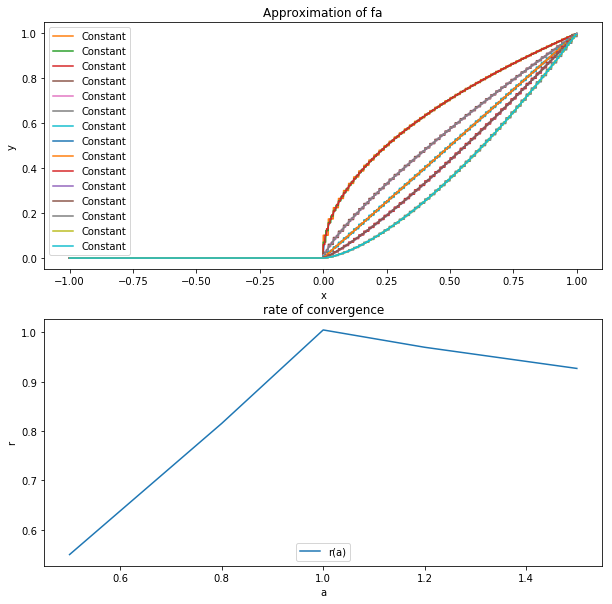

In [43]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

alist = [.5, .8, 1., 1.2, 1.5] #parameters for fa
nx=3000 #total number of points
nnlist=[100, 200, 300] #number of subintervals
xlist = np.linspace(-1, 1, nx) #initializing x values
flist = [0 for x in range(nx)]
ylist =[0.0 for x in range (nx)]
errlist = [0 for x in range(len(nnlist))]
rlist= [0 for x in range(len(alist))]

for k in range(len(alist)) : #for each parameter #print len(nnlist)#debug
    a=alist[k] #initializing
    for i in range(nx):#computing fa(x) for each x values
        flist[i]=f(a,xlist[i])
    ax1.plot(xlist,flist) #plot original function
    for j in range (len(nnlist)) :#for each number of subinterval #print nn #debug#print j #debug
        nn=nnlist[j]#print nn #debug
        ylist=piecewise(xlist, nx, a, nn, ylist) #compute approximation 
        errlist[j]= -math.log(approxerr(flist,ylist,nx),nn)#compute rate of convergence #print errlist[j] #debug
        ax1.plot(xlist, ylist,label='Constant')#plot approximation
    rlist[k] = average(errlist)#compute average rate of convergence for a
    
ax2.plot(alist, rlist, label='r(a)')#plot approximation
plt.legend()                                                     #more graph setup - no math relevance
ax1.set_title(r'Approximation of fa')
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")
ax2.set_title(r'rate of convergence') 
ax2.set_xlabel('a')
ax2.set_ylabel('r')
ax2.legend(loc="lower center")
plt.show()

From the computed values, we can see that r attains a maximum when a=1 and is always slightly greater that a when a<1. Also it is increasing up until 1 and then seems to stagnate, the slight decrease in computed values is probably cause by computional error. The singularity that fa presents at x=0 for a<1 does increase the approximation error, but since we are using discontinuous functions it does affect the curve too much.

Question 3 : Implement an algorithm to interpolate fa(x) by a continuous piecewise linear function on the uniform parition of [−1,1] consisting of n subintervals (as happens in the trapezoidal rule). Plot a couple of illustrative examples with different a and n. Implement a procedure to approximately compute the error of the approximation in the maximum norm, and estimate the rate of convergence for a number of differerent values of a, focusing around the point a=2. Is the behavior different from the preceding exercise? Please explain.

In [44]:
def linear (xlist, nx, a, nn, ylist) :
    #computes approximation of fa by a piecewise linear function for n subintervals and at nx points.
    ylist=[0 for x in range(nx)]#initializing
    length=int(nx/nn)#length of a subinterval #print length#debug
    for i in range(nn): #for each interval
        x0=xlist[i*length] #initializing
        fx0=f(a, x0)
        x1=xlist[(i+1)*length-1]
        fx1=f(a, x1)
        for j in range(length):#for each point in interval
            x=xlist[j+i*length] 
            ylist[j+i*length]= (fx0*(x1-x) +fx1*(x-x0)) / (x1-x0) #assign value #print j+i*length #debug
    return ylist

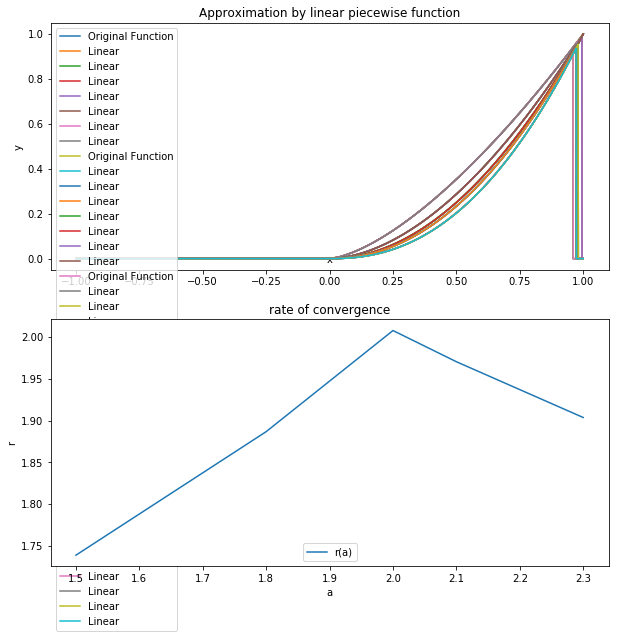

In [45]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot (212)

alist = [1.5,1.8,2.,2.1,2.3] #parameters for fa
nx=3000 #total number of points
nnlist=[40, 44, 50, 70, 80, 90, 102] #number of subintervals
xlist = np.linspace(-1, 1, nx) #initializing x values
flist = [0. for x in range(nx)]
ylist =[0.0 for x in range (nx)]
errlist = [0. for x in range(len(nnlist))]
rlist = [0. for x in range(len(alist))]

for k in range (len(alist)) : #for each a parameter #print len(nnlist)#debug
    a=alist[k] #initializing
    somme=0.
    den=0.
    for i in range(nx):#computing fa(x) for each x values
        flist[i]=f(a,xlist[i])
    ax1.plot(xlist,flist, label='Original Function') #plot original function
    for j in range (len(nnlist)) :#for each number of subinterval #print nn #debug#print j #debug
        nn=nnlist[j]#print nn #debug
        ylist=linear(xlist, nx, a, nn, ylist) #compute approximation#print approxerr(flist,ylist,nx)
        if (approxerr(flist,ylist,nx)!=0.): #some values are bugged and give off 0, which pertubes the averga if taken into account
            if(approxerr(flist,ylist,nx)!=1.): #for some (a,n) combination, there is a bug that make the approximation plummet to 1
                                                #they also pertube the average
                errlist[j]= -math.log(approxerr(flist,ylist,nx),nn)#compute rate of convergence 
                somme = somme + errlist[j] #computing averga manually
                den=den+1
        ax1.plot(xlist, ylist, label='Linear')#plot approximation 
    rlist[k] = somme/den #computing averga manually
ax2.plot(alist,rlist,label='r(a)')

plt.legend()                                                     #more graph setup - no math relevance
ax1.set_title(r'Approximation by linear piecewise function')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")
ax2.set_title(r'rate of convergence') 
ax2.set_xlabel('a')
ax2.set_ylabel('r')
ax2.legend(loc="lower center")
plt.show()

The values of the approximation error are much smaller with this approach, and so the rate of convergence is higher and very stable ~ 9.8 for all a around 2.

Question 4 : Implement an algorithm to compute the Bernstein polynomial of degree n for fa(x). Do not forget to scale the original setting on [0,1] to [−1,1]. Plot a couple of illustrative examples with different a and n. Implement a procedure to approximately compute the error of the approximation in the maximum norm, and estimate the rate of convergence for a number of differerent values of a. What is new compared to the previous exercises? Explain the behaviour.

In [46]:
def Bezier(nn, i, bxlist, plist):
    #compute Bezier curve using Bernstein polynomial and plist - list of control points
    blist = [0 for x in range (nx)] #initializing
    for k in range (nx): # for each x value
        x=bxlist[k] #dummy variable
        somme=0 #initializing
        for i in range (nn+1): #for each control point - degree
            somme+=(comb(nn,i)*pow(x,i)*pow(1-x,nn-i)*plist[i]) #computes bernstein polynomial of degree i * pi
                                                                # pi - control point coordinate, x or y
        blist[k]=somme
    return blist

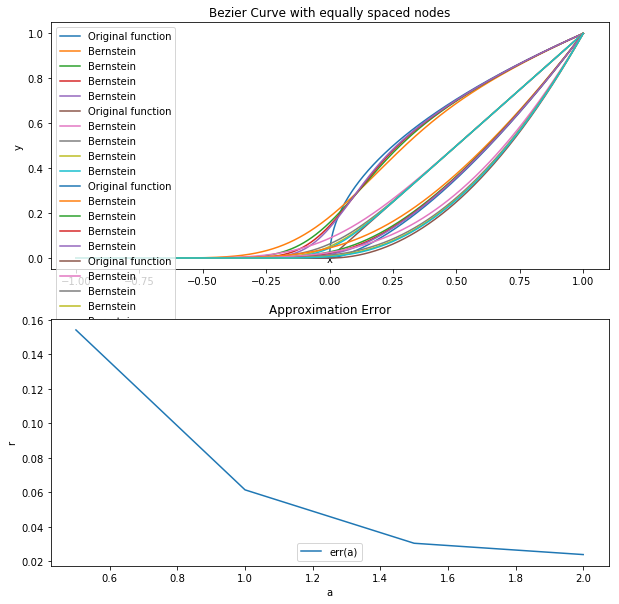

In [47]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot (212)

alist= [.5, 1., 1.5, 2.] #a values
nx=1500 #number of x values - curve resolution
nlist=[20, 40, 60, 80] #number of control points
tlist = np.linspace(0, 1, nx) #initializing t values
flist = [0 for x in range (nx)] #initializing
xlist = np.linspace(-1, 1, nx)#initializing x values
errlist=[0 for k in range (len(nlist))]
rlist=[0 for k in range(len(alist))]

for j in range(len(alist)): #for each a value
    a=alist[j] #dummy variable
    for i in range (nx):#computing f(x) for each x values
        flist[i]=f(a,xlist[i])
    ax1.plot(xlist,flist,label='Original function')
    for k in range(len(nlist)): #for each n value
        nn=nlist[k] #dummy variable
        xplist = np.linspace(-1, 1, nn+1)#initializing control point's x coordinates
        yplist = [0 for x in range (nn+1)]
        for i in range (nn+1): #computing y coordinates for each control point - y=f(x)
            yplist[i]=f(a,xplist[i])
        xblist=Bezier(nn, i, tlist, xplist)#computing B(t)x Bezier curve 
        yblist=Bezier(nn, i, tlist, yplist)#computing B(t)y  
        errlist[k]=approxerr(flist, yblist, nx) #computing ||f-y|| in max norm
        ax1.plot(xblist, yblist, label='Bernstein') 
    rlist[j]=average(errlist) #computing average of ||f-y|| for a fixed a#print "average approximation error for a=%.1f"%a#print rlist[j]#debug
ax2.plot(alist,rlist, label='err(a)')

plt.legend()                                                     #more graph setup - no math relevance
ax1.set_title(r'Bezier Curve with equally spaced nodes')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="upper left")
ax2.set_title(r'Approximation Error') 
ax2.set_xlabel('a')
ax2.set_ylabel('err')
ax2.legend(loc="lower center")
plt.show()

Here we can see that the approach to approximation is completely different. First f(0) and y(0) - let y be the approximation of f - differ by a lot compared to the previous methods. This can be simply explained by the fact that f presents a discontinuity at x=0 when a<1. The sudden shift in concavity of fa is hard to imitate with bernstein polynomials, since they were designed to be smooth functions and converges in a very slow fashion for functions with singularities.

Question 5 : Implement an algorithm to compute the Chebyshev interpolation polynomial of degree n for fa(x). Plot a couple of illustrative examples with different a and n. Implement a procedure to approximately compute the error of the approximation in the maximum norm, and estimate the rate of convergence for a number of differerent values of a. How does the rate of convergence depend on the regularity of the function? Please explain the behaviour.

In [48]:
def ChebyNodes(nn):
    #finds coordinates of Chebishev nodes for nn - number of nodes
    nodelist =[float(0.) for x in range (nn+1)] #initializing
    for i in range(nn+1):#print i#debug
        nodelist[i]=math.cos(math.pi*(2*(i+1)-1)/(2*(nn+1)))
    nodelist.reverse()#print 'nodes'#print nodelist
    return nodelist

In [49]:
def ChebyPoly (x, n):
    #computes value of Chebyshev polynomial of degree n at point x
    a=1#initializing
    b=x
    c=-10 
    if (n==0): #T0 is 1 for all x #print 'yes 0'#debug
        y=a
    if(n==1):#T1 is x#print 'yes 1'#debug
        y=b
    if(n>1):#print 'yes 2'#debug
        for i in range(n-1): #Recursive formula : Tn=2xT;n-1(x)-T;n-2(x)
            c=2*x*b-a
            a=b
            b=c
        y=c#print y #debug
    return y

In [50]:
def ChebyCoef(xlist, nx, a, nn, nodelist):
    #computes coefficients ci for Chebyshev interpolation 
    clist = [0 for k in range(nn+1)] #initializing
    for i in range (nn): #for each n
        somme=0 #initializing
        for j in range (nn+1): #sum over n=1 to n
            j=j+1 #sum starts at j=1
            xj=nodelist[j-1] #dummy variable#print 'xj, f(xj), chebypoly(xj), prod' #print xj#print f(a,xj)#print ChebyPoly(xj,i)#debug
            prod=f(a,xj)*ChebyPoly(xj,i)#print prod #debug
            somme=somme+prod#print 'somme = %.5f'%somme #debug
        den = 2./(nn+1)#print '2/nn+1 =%.5f '%den #debug
        clist[i]=somme*den#print 'clist[i]=%.5f'%clist[i]#print 'coeff #print clist #debug
    return clist

In [51]:
def Chebyshev (xlist, nx, a, nn):
    #computes Chebyshev polynomial of degree n for fa(x) given an n
    nodelist=ChebyNodes(nn) #computing n+1 Chebishev nodes
    ylist = [0 for k in range(nx)] #initializing
    clist = ChebyCoef(xlist, nx, a, nn, nodelist) #computing Chebyshev coefficients
    for i in range(nx): #for each x value
        x=xlist[i] #initializing
        somme=0
        for j in range(nn): #sum over all n
            c=clist[j] #print c #debug
            if(j==0): #the first term is halved
                c=clist[j]*.5
            somme=somme+c*ChebyPoly(x,j)#print ChebyPoly(x,j)#print somme #debug
        ylist[i]=somme#print ylist[i]
    return ylist

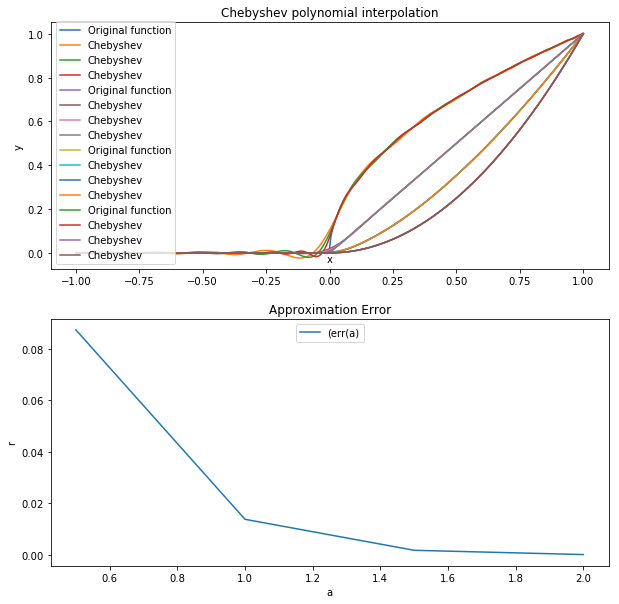

In [52]:
fig = plt.figure(figsize=(10,10)) #graph setup
ax1 = fig.add_subplot(211)
ax2 = fig.add_subplot(212)

alist=[.5, 1., 1.5, 2.] #a values
nx=3000 #number of x values - curve resolution
nlist=[25, 35, 55] # number of nodes
xlist = np.linspace(-1, 1, nx)#initializing x values
flist = [0 for x in range (nx)] #initializing
errlist=[0 for k in range(len(nlist))]
rlist=[0 for k in range(len(alist))]

for k in range(len(alist)): #for each a value
    a=alist[k] #dummy variable
    for i in range (nx):#computing f(x) for each x values
        flist[i]=f(a,xlist[i])
    ax1.plot(xlist,flist,label='Original function')
    for j in range(len(nlist)): #for each n value
        nn=nlist[j] #dummy variable
        ylist=Chebyshev (xlist, nx, a, nn) #computing Lagrange interpolation with equally spaced nodes
        ax1.plot(xlist,ylist,label='Chebyshev')
        errlist[j]=approxerr(flist,ylist,nx) #computing max|f-y|
    err=average(errlist) #average over n for a fixed a
    rlist[k]=err  #storing average
ax2.plot(alist,rlist,label='(err(a)')

plt.legend()                                                             #more graph setup - no math relevance
ax1.set_title(r'Chebyshev Polynomial Interpolation')
ax1.xaxis.set_label_coords(.5,.06)
ax1.set_xlabel('x')
ax1.set_ylabel('y')
ax1.legend(loc="lower left")
ax2.set_title(r'Approximation Error') 
ax2.set_xlabel('a')
ax2.set_ylabel('err')
ax2.legend(loc="upper center")
plt.show()

So for the Chebyshev interpolation we can see that as with the Bernstein polynomial method, the point 0 presents a discontinuity when a<1 which makes it hard to approximate f accurately. However for a>1, we can see that the curve get really accurate.